<a href="https://colab.research.google.com/github/zzheng2020/ID2222-Data-Mining/blob/main/Homework4_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import networkx as nx
from sklearn.cluster import KMeans
import networkx as nx

In [2]:
data_file = '/Users/zihengzhang/KTH/ID2222-FID3016-HT22-Data-Mining/example1.dat'

In [3]:
def load_graph(file: str, weight: bool = False) -> nx.Graph:
    if weight:
        return nx.read_weighted_edgelist(
            path=file,
            delimiter=','
        )
    else:
        return nx.read_edgelist(
            path=file,
            delimiter=','
        )

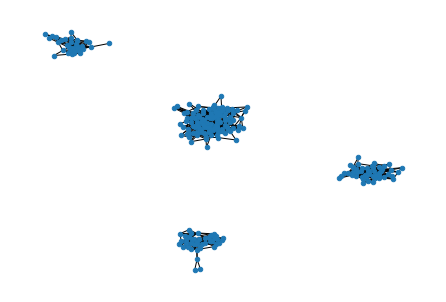

In [4]:
graph = load_graph(data_file)
nx.draw(graph, node_size=20)
plt.show()

In [5]:
list(graph.neighbors('1'))

['2', '3', '4', '5', '6', '7', '72']

In [6]:
k = 4
A = nx.to_numpy_array(graph)
D = np.diagflat(np.sum(A, axis=1))
D_inv = np.linalg.inv(np.sqrt(D))
L = D_inv @ A @ D_inv
w, v = np.linalg.eigh(L) # w: eigenvalues, v: eigenvectors

# The column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]. 
X = v[:, -k:]

# default: Frobenius norm
Y = X / np.linalg.norm(X, axis=1, keepdims=True)

res = KMeans(n_clusters=k).fit(Y).labels_
res

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [7]:
values, vectors = np.linalg.eig(D-A)

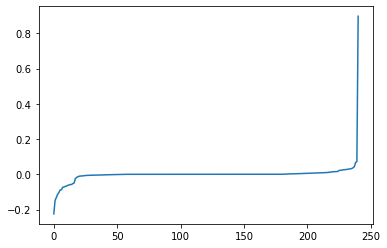

In [8]:
plt.plot(np.sort(vectors[:, 1]))

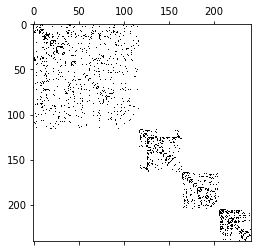

In [9]:
plt.spy(A);

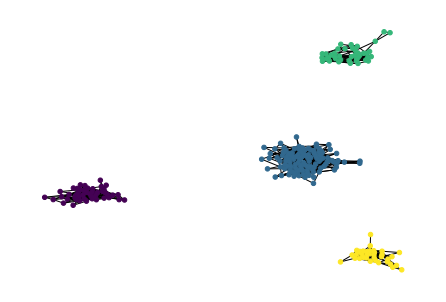

In [10]:
nx.draw(graph, node_size=20, node_color=res)

In [11]:
data_file2 = '/Users/zihengzhang/Downloads/example2.dat'

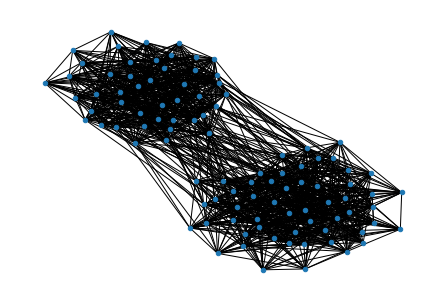

In [12]:
graph = load_graph(data_file2, weight=True)
nx.draw(graph, node_size=20)
plt.show()

In [13]:
k = 2
A = nx.to_numpy_array(graph)
D = np.diagflat(np.sum(A, axis=1))
D_inv = np.linalg.inv(np.sqrt(D))
L = D_inv @ A @ D_inv
w, v = np.linalg.eigh(L) # w: eigenvalues, v: eigenvectors

# The column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]. 
X = v[:, -k:]

# default: Frobenius norm
Y = X / np.linalg.norm(X, axis=1, keepdims=True)

res = KMeans(n_clusters=k).fit(Y).labels_
res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

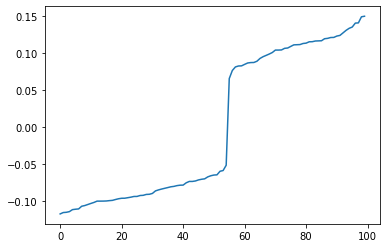

In [19]:
values, vectors = np.linalg.eig(D-A)
plt.plot(np.sort(vectors[:, 1]))

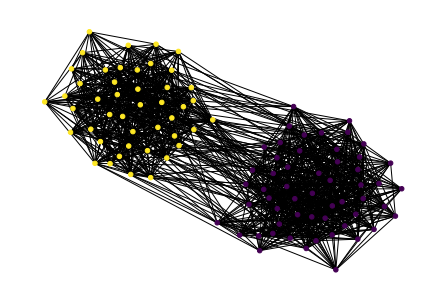

In [20]:
nx.draw(graph, node_size=20, node_color=res)

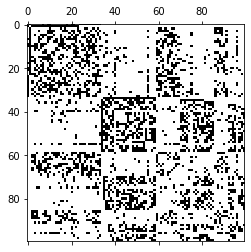

In [21]:
plt.spy(A);

In [72]:







# ===================













In [113]:
k = 4
A = nx.to_numpy_array(graph)
D = np.diagflat(np.sum(A, axis=1))
D_inv = np.linalg.inv(np.sqrt(D))
L = D_inv @ (D - A) @ D_inv
w, v = np.linalg.eigh(L) # w: eigenvalues, v: eigenvectors

# instead we use min k eigenvalues
X = v[:, :k]

# https://stackoverflow.com/a/17769502/8454039
# supress div 0 err
np.seterr(all='ignore')
Y = X / np.linalg.norm(X, axis=1, keepdims=True)
norms = np.sqrt((X**2).sum(axis=1,keepdims=True))
Y[:] = np.where(norms!=0, Y, 0.)

res = KMeans(n_clusters=k).fit(Y).labels_
res

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

[-0.5930665  -0.58544121 -0.58358871 -0.56167881 -0.55525411 -0.54567899
 -0.54080177 -0.53909372 -0.52809515 -0.52541261]


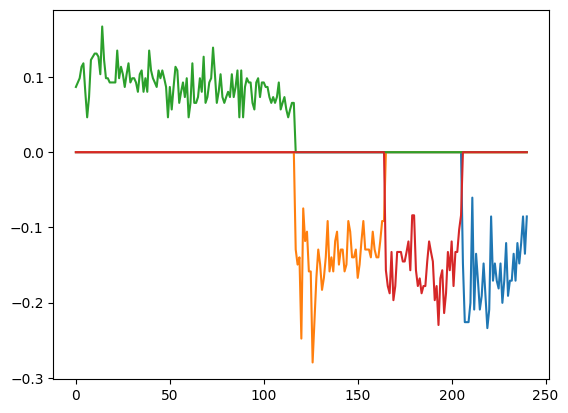

In [114]:
values, vectors = np.linalg.eigh(D_inv @ A @ D_inv)
print(values[:10])
plt.plot(vectors[:, -1])
plt.plot(vectors[:, -2])
plt.plot(vectors[:, -3])
plt.plot(vectors[:, -4])

[-3.95822895e-16 -9.48225069e-17  1.90773928e-16  5.46157485e-16
  1.67677282e-01  2.21486649e-01  2.46529005e-01  2.49193506e-01
  2.63382359e-01  2.73200718e-01]


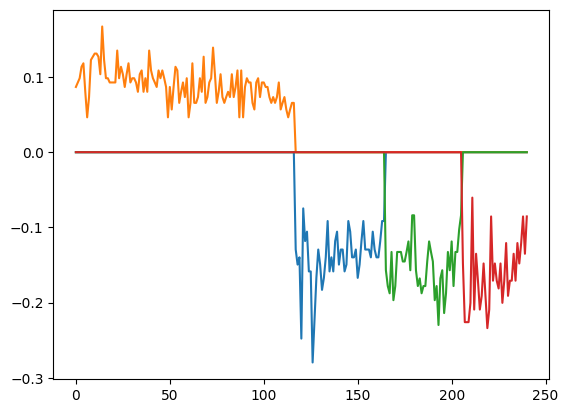

In [115]:
# normalization mapped the eigenvectors, 
values, vectors = np.linalg.eigh(D_inv @ (D - A) @ D_inv)
print(values[:10])
plt.plot(vectors[:, 0])
plt.plot(vectors[:, 1])
plt.plot(vectors[:, 2])
plt.plot(vectors[:, 3])

[-8.15732176e-15 -5.69263391e-15  1.56616758e-15  3.54870041e-15
  4.26173719e-01  8.07341776e-01  1.11104607e+00  1.34777269e+00
  1.42400923e+00  1.49149550e+00]


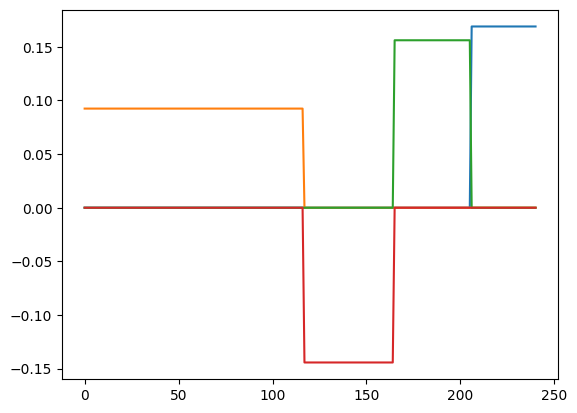

In [116]:
# normalization mapped the eigenvectors, 
values, vectors = np.linalg.eigh(D-A)
print(values[:10])
plt.plot(vectors[:, 0])
plt.plot(vectors[:, 1])
plt.plot(vectors[:, 2])
plt.plot(vectors[:, 3])

In [119]:
import random
samples = random.sample([i for i in range(len(values))], 15)
print(X[samples, :])

[[ 0.          0.11359237  0.          0.        ]
 [ 0.          0.09274778  0.          0.        ]
 [ 0.          0.04637389  0.          0.        ]
 [ 0.          0.0867576   0.          0.        ]
 [ 0.          0.13520196  0.          0.        ]
 [ 0.          0.09274778  0.          0.        ]
 [ 0.          0.07332356  0.          0.        ]
 [ 0.          0.          0.         -0.22604179]
 [ 0.          0.          0.         -0.22604179]
 [-0.15855493  0.          0.          0.        ]
 [ 0.          0.07332356  0.          0.        ]
 [ 0.          0.         -0.15699646  0.        ]
 [ 0.          0.         -0.13268622  0.        ]
 [ 0.          0.         -0.17801725  0.        ]
 [ 0.          0.          0.         -0.14797909]]
